[100. 250. 220. 100. 230. 220.]
[12321. 29241. 11211. 12321.  8736. 10656.]
[2 5 4 1 3 0]
[0.79664777 0.70984056 0.16573009 0.         0.        ]
haha [2 3 4]
old_index [2 5 4 1 3 0]
new_index [1 3 0]
[0. 0.]
haha [0 1]
old_index [1 3 0]
new_index [3 0]
[1.]
haha []
old_index [3 0]
new_index []


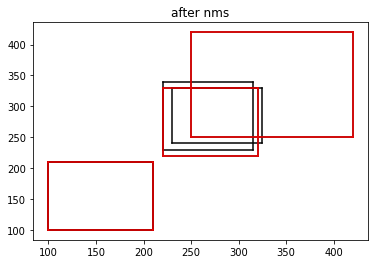

In [1]:
"""
Created on Mon May  7 21:45:37 2018

@author: wangtuo
"""
import numpy as np


boxes=np.array([[100,100,210,210,0.72],
        [250,250,420,420,0.8],
        [220,220,320,330,0.92],
        [100,100,210,210,0.72],
        [230,240,325,330,0.81],
        [220,230,315,340,0.9]]) 


def py_cpu_nms(dets, thresh):
    # dets:(m,5)  thresh:scaler
    
    x1 = dets[:,0]
    y1 = dets[:,1]
    x2 = dets[:,2]
    y2 = dets[:,3]
    print(x1)
    areas = (y2-y1+1) * (x2-x1+1)
    print(areas)
    scores = dets[:,4]
    keep = []
    
    index = scores.argsort()[::-1]
    print(index)
    
    while index.size >0:

        i = index[0]       # every time the first is the biggst, and add it directly
        keep.append(i)
        
        x11 = np.maximum(x1[i], x1[index[1:]])    # calculate the points of overlap 
        y11 = np.maximum(y1[i], y1[index[1:]])
        x22 = np.minimum(x2[i], x2[index[1:]])
        y22 = np.minimum(y2[i], y2[index[1:]])
        
        w = np.maximum(0, x22-x11+1)    # the weights of overlap
        h = np.maximum(0, y22-y11+1)    # the height of overlap
       
        overlaps = w*h
        
        ious = overlaps / (areas[i]+areas[index[1:]] - overlaps)
        print(ious)
        print("haha",np.where(ious<=thresh)[0])
        idx = np.where(ious<=thresh)[0]
        print("old_index",index)
        index = index[idx+1]   # because index start from 1 except it self 
        print("new_index",index)
        
    return keep
        

import matplotlib.pyplot as plt
def plot_bbox(dets, c='k'):
    
    x1 = dets[:,0]
    y1 = dets[:,1]
    x2 = dets[:,2]
    y2 = dets[:,3]
    
    
    plt.plot([x1,x2], [y1,y1], c)
    plt.plot([x1,x1], [y1,y2], c)
    plt.plot([x1,x2], [y2,y2], c)
    plt.plot([x2,x2], [y1,y2], c)
    plt.title("after nms")

plot_bbox(boxes,'k')   # before nms

keep = py_cpu_nms(boxes, thresh=0.7)
plot_bbox(boxes[keep], 'r')# after nms